In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv
/kaggle/input/bank-marketing-dataset/bank.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
num_cols=df.select_dtypes(include=['number']).columns.tolist()
cat_cols=df.select_dtypes(include=['category','object']).columns.tolist()

In [6]:
cat_cols, num_cols

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'deposit'],
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
X=df.drop(columns=['loan'], axis=1)
y=df['loan']

In [9]:
X.shape, y.shape

((11162, 16), (11162,))

In [10]:
y = y.map({"yes": 1, "no": 0})


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: loan
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [13]:
y.unique()

array([0, 1])

In [14]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [15]:
cat_cols.remove('loan')

In [16]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)


In [20]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [22]:
print(type(X_train))
print(X_train.dtype)


<class 'numpy.ndarray'>
float64


In [23]:
X_train.shape, X_test.shape

((8929, 42), (2233, 42))

In [24]:
X_train

array([[ 1.14643868,  1.68761105,  1.69442818, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86102339, -0.35066205, -0.5560058 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.94466765, -0.20504785,  0.39154535, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.86102339, -0.26889658, -1.02978138, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.2263519 , -0.32166951,  0.50998924, ...,  0.        ,
         1.        ,  1.        ],
       [-0.61009063, -0.34740446,  1.69442818, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2026-02-08 19:10:31.436643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770577831.708854      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770577831.785423      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770577832.439495      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770577832.439552      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770577832.439556      17 computation_placer.cc:177] computation placer alr

In [26]:
(X_train.shape[1])

42

In [27]:
model=Sequential()

model.add(Dense(64 , activation='relu', input_dim=(X_train.shape[1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-08 19:10:48.332389: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='binary_crossentropy')

In [30]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [31]:
X_train

array([[ 1.14643868,  1.68761105,  1.69442818, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86102339, -0.35066205, -0.5560058 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.94466765, -0.20504785,  0.39154535, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.86102339, -0.26889658, -1.02978138, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.2263519 , -0.32166951,  0.50998924, ...,  0.        ,
         1.        ,  1.        ],
       [-0.61009063, -0.34740446,  1.69442818, ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
history=model.fit(X_train, y_train , validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8345 - loss: 0.4445 - val_accuracy: 0.8679 - val_loss: 0.3715
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.3592 - val_accuracy: 0.8684 - val_loss: 0.3660
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8758 - loss: 0.3423 - val_accuracy: 0.8679 - val_loss: 0.3629
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.3585 - val_accuracy: 0.8695 - val_loss: 0.3609
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3405 - val_accuracy: 0.8679 - val_loss: 0.3610
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8735 - loss: 0.3332 - val_accuracy: 0.8707 - val_loss: 0.3580
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3284 - val_accuracy: 0.8735 - val_loss: 0.3547
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8733 - loss: 0.3246 - val_accuracy: 0.

In [33]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print(f'test_loss: {test_loss}')
print(f'test_accuracu: {test_accuracy}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.4735
test_loss: 0.48980432748794556
test_accuracu: 0.8387818932533264


In [34]:
history.history

{'accuracy': [0.8625227212905884,
  0.8696625828742981,
  0.8700826168060303,
  0.8710625767707825,
  0.8727425336837769,
  0.8716225624084473,
  0.8738625049591064,
  0.8745625019073486,
  0.8748425245285034,
  0.8770824670791626,
  0.8780624270439148,
  0.8791823983192444,
  0.8801624178886414,
  0.880302369594574,
  0.8817023634910583,
  0.8817023634910583,
  0.8840823173522949,
  0.8868822455406189,
  0.8868822455406189,
  0.8882822394371033,
  0.8899621963500977,
  0.891642153263092,
  0.891362190246582,
  0.8927621245384216,
  0.8955621123313904,
  0.8965420722961426,
  0.89696204662323,
  0.8992019891738892,
  0.8996220231056213,
  0.8999019861221313,
  0.8999019861221313,
  0.8997620344161987,
  0.9043819308280945,
  0.9043819308280945,
  0.9039618968963623,
  0.9078818559646606,
  0.9069018363952637,
  0.9099817872047424,
  0.9118017554283142,
  0.9115217924118042,
  0.9113817811012268,
  0.9139017462730408,
  0.9192216396331787,
  0.9168416857719421,
  0.9174016714096069,
  0

In [35]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) #

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.838781907747425

In [37]:
model.layers[0].get_weights()

[array([[ 0.05627109, -0.32914752, -0.21046679, ...,  0.09883087,
         -0.21573149, -0.34086967],
        [ 0.1279437 ,  0.3996151 , -0.42198548, ...,  0.11054152,
          0.16130593,  0.15417004],
        [-0.23252214,  0.07352677, -0.2835711 , ...,  0.0645453 ,
         -0.36725104, -0.02952753],
        ...,
        [ 0.4395081 ,  0.06826945, -0.05792486, ..., -0.19995409,
         -0.21203709, -0.04588697],
        [-0.02571299,  0.36039564, -0.18495984, ..., -0.23466918,
          0.31308007, -0.1583094 ],
        [ 0.25435767,  0.18346575, -0.24845345, ...,  0.163548  ,
          0.13423158, -0.15686798]], dtype=float32),
 array([ 6.70035854e-02,  1.02349237e-01, -1.09159037e-01,  8.21876377e-02,
         1.26171157e-01, -1.13553874e-01, -8.61636549e-02, -3.98222692e-02,
         4.06382419e-02,  1.02868818e-01, -2.69313023e-04,  4.31104079e-02,
         8.62746686e-02,  7.53262192e-02, -1.82613693e-02,  1.16210900e-01,
        -1.59571633e-01,  1.19935900e-01, -1.11316726e

In [38]:
print("before any hyperparameters")

before any hyperparameters


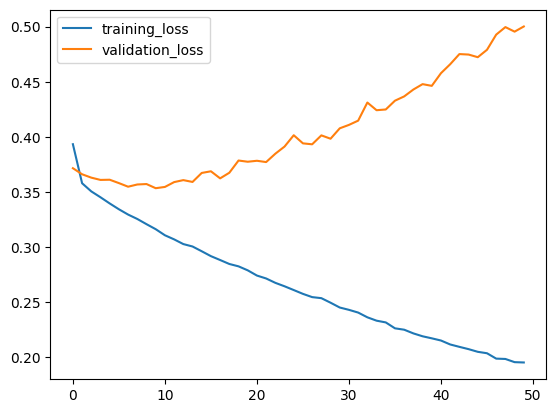

In [39]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

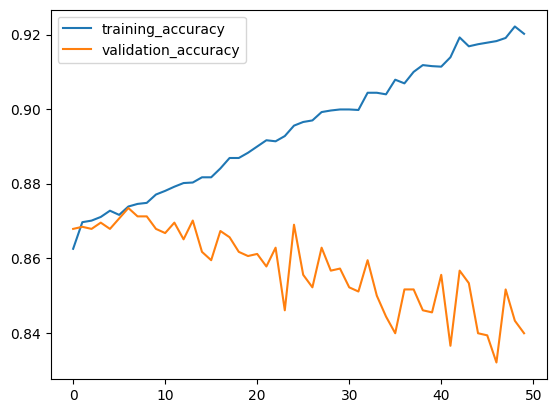

In [40]:
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()
# clearly showign the case of the overfitting

In [41]:
# now we will make the model with the hyperparametrs

In [42]:
from tensorflow.keras.layers import Dense, BatchNormalization , Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model2=Sequential()

model2.add(Dense( 64, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4), input_dim=(X_train.shape[1])))
model2.add(BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(Dropout(0.3))


model2.add(Dense( 32, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4) ))
model2.add(BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model2.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [45]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [46]:
history=model2.fit(X_train , y_train , validation_split=0.3, epochs=50, batch_size=32, callbacks=[early_stop])

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6328 - loss: 0.6790 - val_accuracy: 0.8679 - val_loss: 0.4185
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8601 - loss: 0.4273 - val_accuracy: 0.8675 - val_loss: 0.3933
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8652 - loss: 0.4072 - val_accuracy: 0.8671 - val_loss: 0.3881
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8604 - loss: 0.4158 - val_accuracy: 0.8679 - val_loss: 0.3839
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8696 - loss: 0.3874 - val_accuracy: 0.8682 - val_loss: 0.3826
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8686 - loss: 0.3881 - val_accuracy: 0.8682 - val_loss: 0.3802
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8704 - loss: 0.3875 - val_accuracy: 0.8682 - val_loss: 0.3782
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8711 - loss: 0.3775 - val_accuracy: 0.

In [47]:
history=model2.fit(X_train , y_train , validation_split=0.3, epochs=50, batch_size=32)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8656 - loss: 0.3652 - val_accuracy: 0.8690 - val_loss: 0.3690
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8723 - loss: 0.3604 - val_accuracy: 0.8690 - val_loss: 0.3692
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8747 - loss: 0.3526 - val_accuracy: 0.8690 - val_loss: 0.3700
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.3519 - val_accuracy: 0.8705 - val_loss: 0.3687
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8689 - loss: 0.3599 - val_accuracy: 0.8708 - val_loss: 0.3688
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.3475 - val_accuracy: 0.8697 - val_loss: 0.3689
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8694 - loss: 0.3566 - val_accuracy: 0.8694 - val_loss: 0.3682
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8773 - loss: 0.3439 - val_accuracy: 0.

In [48]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print(f'test_loss: {test_loss}')
print(f'test_accuracu: {test_accuracy}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.4735
test_loss: 0.48980432748794556
test_accuracu: 0.8387818932533264


In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.838781907747425

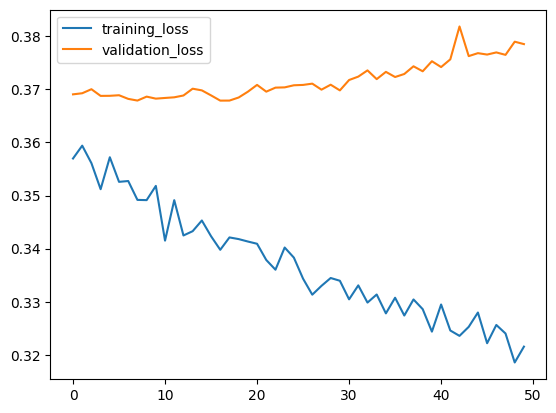

In [50]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

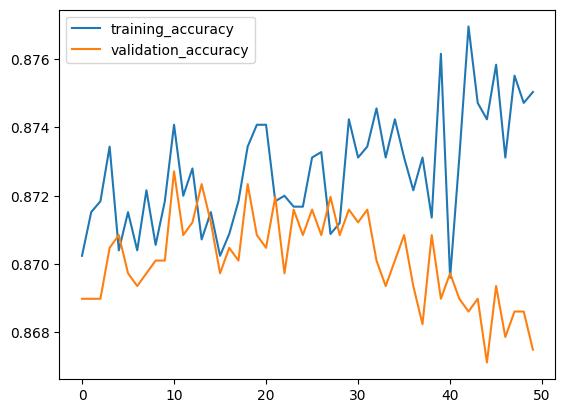

In [51]:
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()
